In [0]:
import pandas as pd                 # package for data frame analysis
import matplotlib.pyplot as plt     # package for graphical plot
import seaborn as sns               # package for graphical plot
import numpy as np                  # package for mathematical calculation
from scipy import stats             # package for statistical calculation
import io                           # pakcage for input/output 
from google.colab import files      # package for Google drive manipulation
import geopy.distance

import warnings                     # disable warning notification (optional)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/My Drive/Data/trainmod3.csv')
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,8.450145
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,2010,1.999160


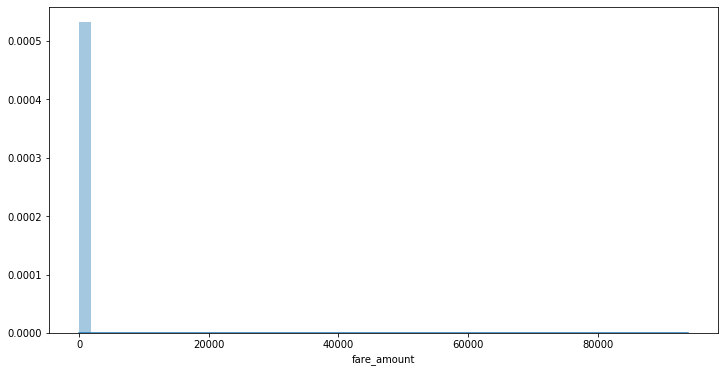

In [4]:
plt.subplots(figsize=(12,6))
sns.distplot(data['fare_amount'])

In [0]:
data = data.drop(index = data[data['fare_amount']<=0].index)

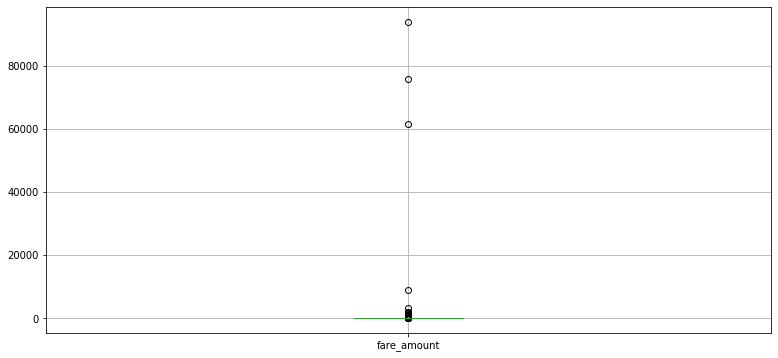

In [5]:
plt.figure(figsize=(13, 6))
boxplot = data.boxplot(column=['fare_amount'])

In [0]:
data = data.drop(index = data[data['fare_amount']<=0].index)
data['fare_log'] = np.log1p(data['fare_amount']) # log(1+x)
data = data[np.abs(data['fare_log']-data['fare_log'].mean()) <= (3*data['fare_log'].std())]

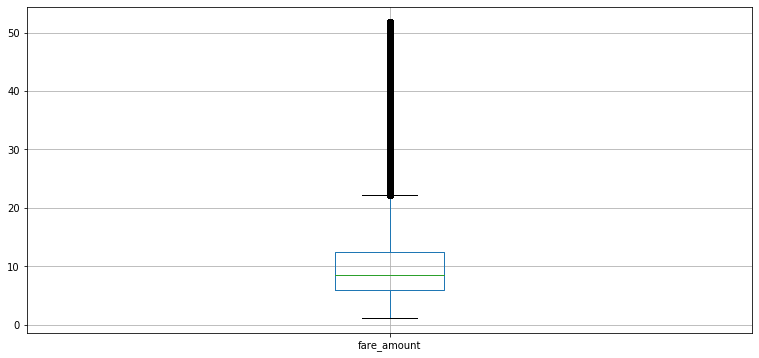

In [6]:
plt.figure(figsize=(13, 6))
boxplot = data.boxplot(column=['fare_amount'])

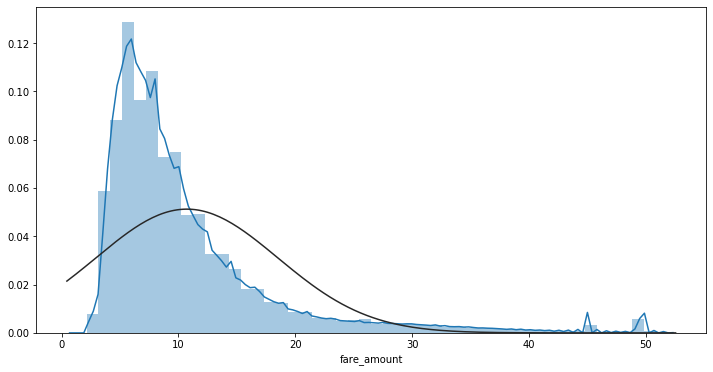

In [0]:
plt.subplots(figsize=(12,6))
sns.distplot(data['fare_amount'], fit=stats.norm)

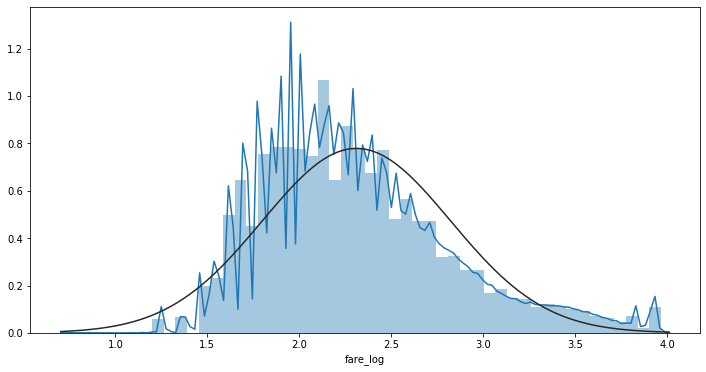

In [0]:
plt.subplots(figsize=(12,6))
sns.distplot(data['fare_log'], fit=stats.norm)

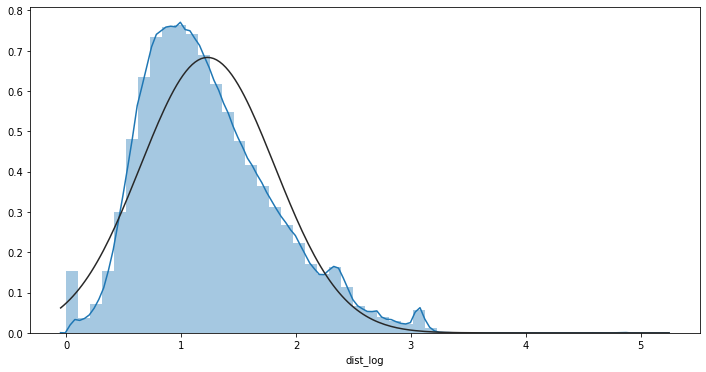

In [14]:
plt.subplots(figsize=(12,6))
sns.distplot(data['dist_log'], fit=stats.norm)

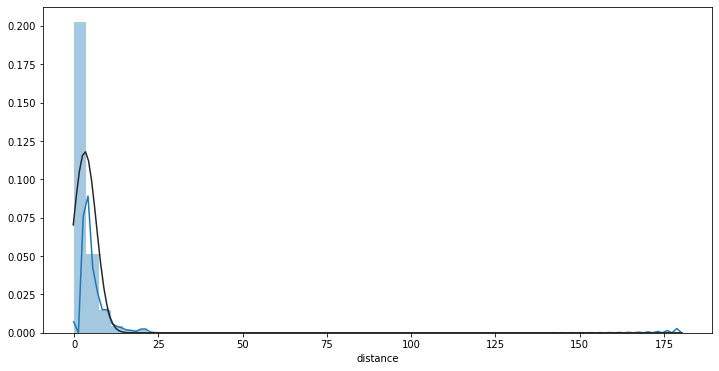

In [15]:
plt.subplots(figsize=(12,6))
sns.distplot(data['distance'], fit=stats.norm)

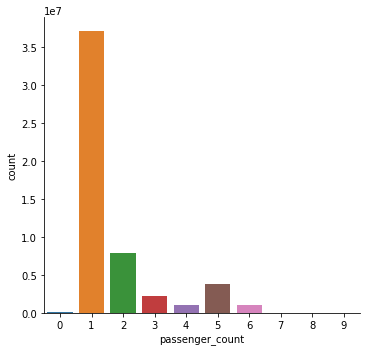

In [17]:
g = sns.catplot(x='passenger_count', kind='count', data = data[data['passenger_count']<10])
g.set_xticklabels(rotation=0)

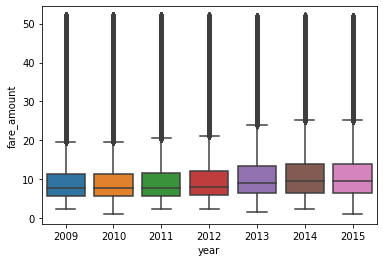

In [7]:
sns.boxplot(x="year", y="fare_amount", data=data)

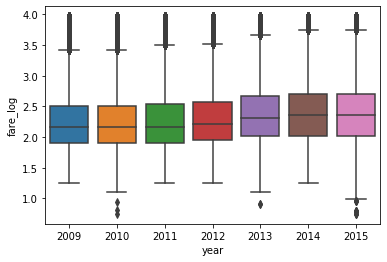

In [8]:
sns.boxplot(x="year", y="fare_log", data=data)

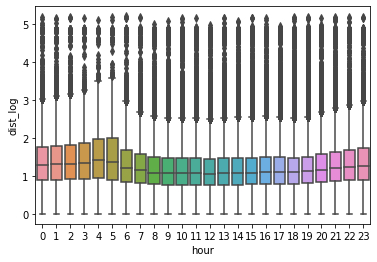

In [13]:
data['dist_log']= np.log1p(data['distance']) # log(1+x)
sns.boxplot(x="hour", y="dist_log", data=data)

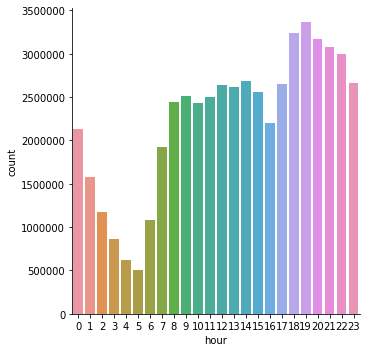

In [0]:
g = sns.catplot(x='hour', kind='count', data = data)
g.set_xticklabels(rotation=0)

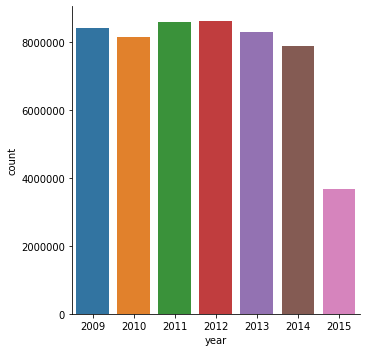

In [0]:
g = sns.catplot(x='year', kind='count', data = data)
g.set_xticklabels(rotation=0)

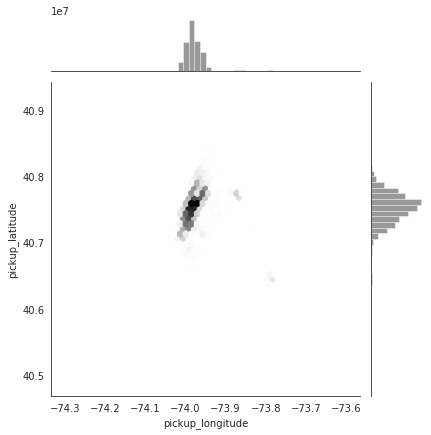

In [0]:
with sns.axes_style("white"):
    sns.jointplot(x=data['pickup_longitude'], y= data['pickup_latitude'], kind="hex", color="k");

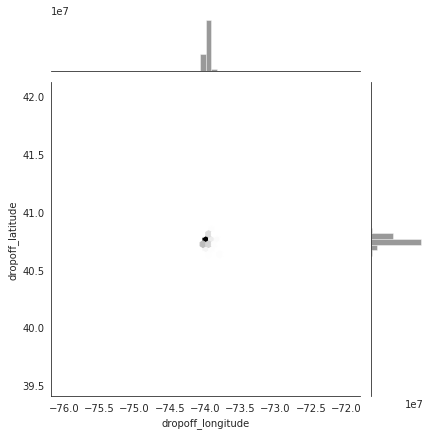

In [0]:
with sns.axes_style("white"):
    sns.jointplot(x=data['dropoff_longitude'], y= data['dropoff_latitude'], kind="hex", color="k");

In [0]:
df = data[data['pickup_longitude']>-74.05]
df = df[df['pickup_longitude']<-73.9]
df = df[df['pickup_latitude']>40.7]
df = df[df['pickup_latitude']<40.8]

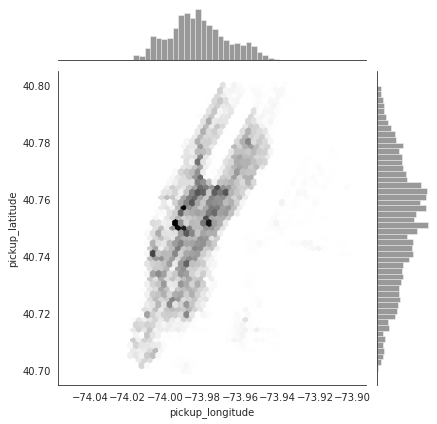

In [0]:
with sns.axes_style("white"):
    sns.jointplot(x=df['pickup_longitude'], y= df['pickup_latitude'], kind="hex", color="k");

In [0]:
sns.jointplot(x=df['pickup_longitude'], y= df['pickup_latitude'], kind="kde")

In [0]:
df = data[data['dropoff_longitude']>-74.05]
df = df[df['dropoff_longitude']<-73.9]
df = df[df['dropoff_latitude']>40.7]
df = df[df['dropoff_latitude']<40.8]

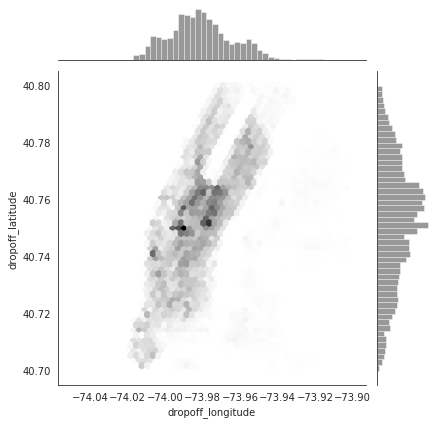

In [0]:
with sns.axes_style("white"):
    sns.jointplot(x=df['dropoff_longitude'], y= df['dropoff_latitude'], kind="hex", color="k");

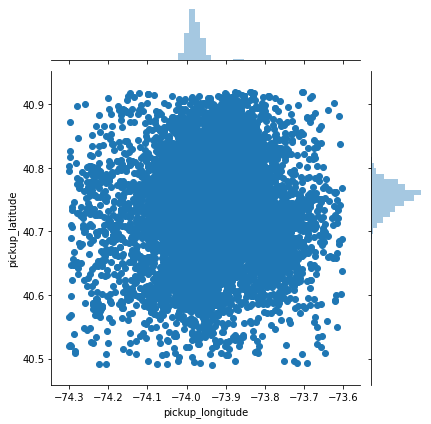

In [0]:
df2 = data[data['hour']==18]
sns.jointplot(x=df2['pickup_longitude'], y= df2['pickup_latitude'])

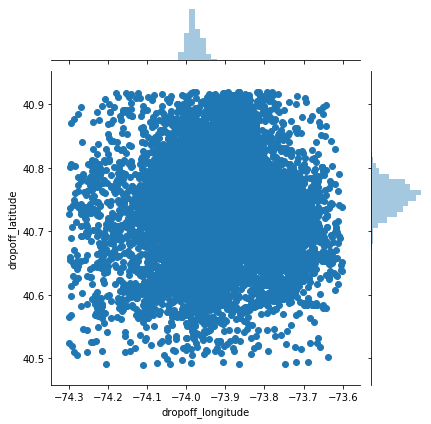

In [0]:
df2 = df2[df2['dropoff_latitude']>40.49]
df2 = df2[df2['dropoff_latitude']<40.92]
df2 = df2[df2['dropoff_longitude']>-74.3]
df2 = df2[df2['dropoff_longitude']<-73.6]
sns.jointplot(x=df2['dropoff_longitude'], y= df2['dropoff_latitude'])

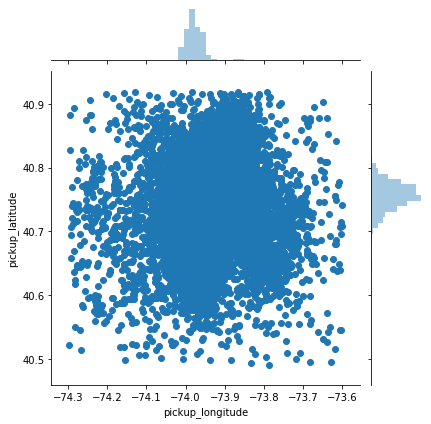

In [0]:
df2 = data[data['hour']==8]
sns.jointplot(x=df2['pickup_longitude'], y= df2['pickup_latitude'])

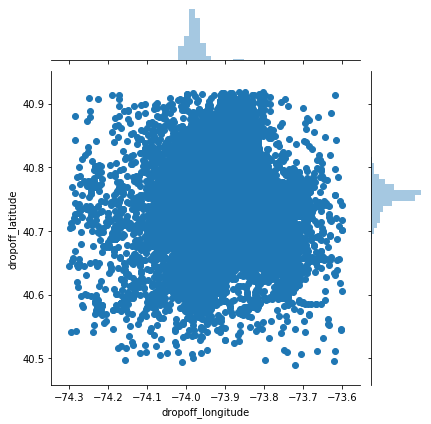

In [0]:
df2 = df2[df2['dropoff_latitude']>40.49]
df2 = df2[df2['dropoff_latitude']<40.92]
df2 = df2[df2['dropoff_longitude']>-74.3]
df2 = df2[df2['dropoff_longitude']<-73.6]
sns.jointplot(x=df2['dropoff_longitude'], y= df2['dropoff_latitude'])

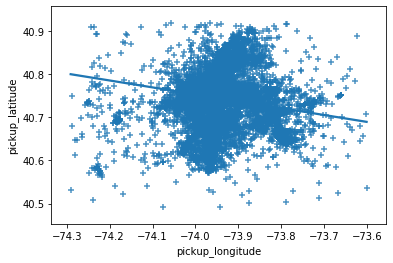

In [8]:
df = data[data['hour']==5]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

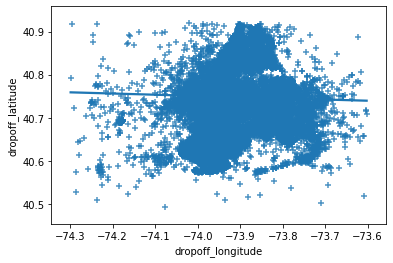

In [9]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

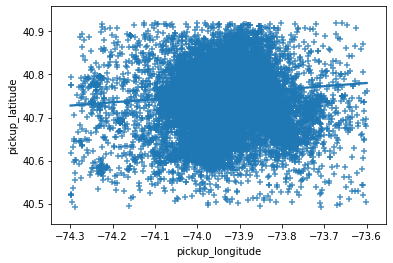

In [5]:
df = data[data['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

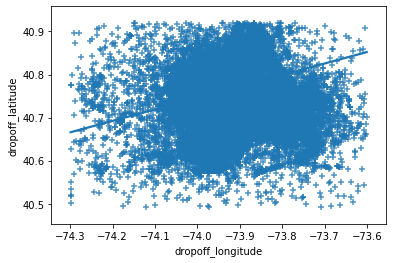

In [6]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

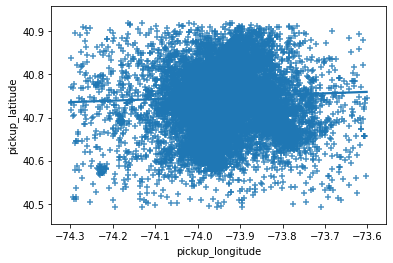

In [10]:
df = data[data['hour']==23]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

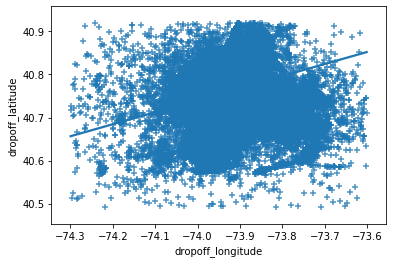

In [11]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

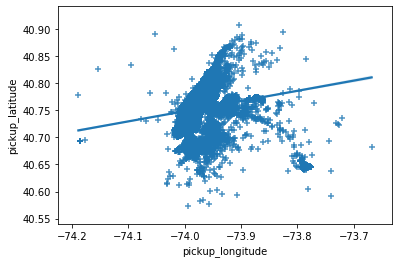

In [19]:
df2 = data[data['year']==2015]
df = df2[df2['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

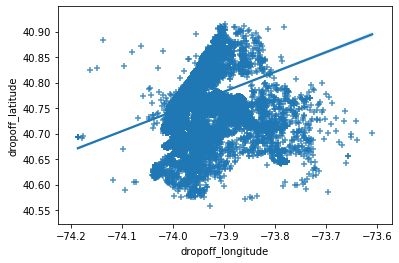

In [20]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

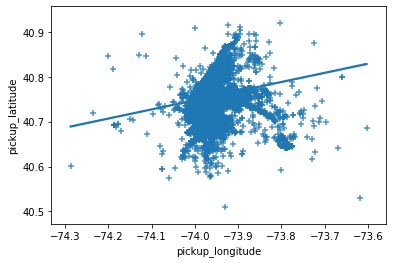

In [21]:
df2 = data[data['year']==2014]
df = df2[df2['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

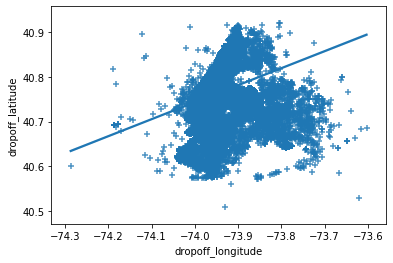

In [22]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

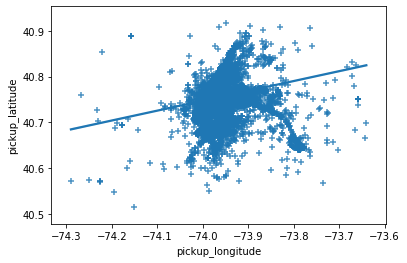

In [23]:
df2 = data[data['year']==2013]
df = df2[df2['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

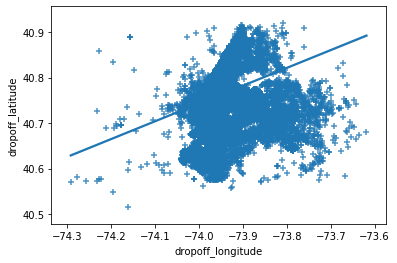

In [24]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

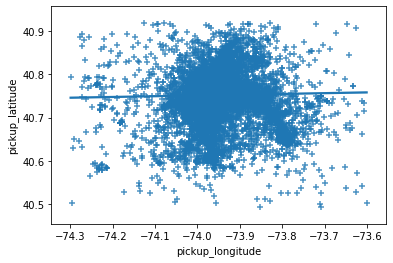

In [25]:
df2 = data[data['year']==2010]
df = df2[df2['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

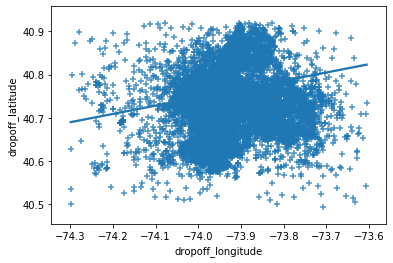

In [26]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

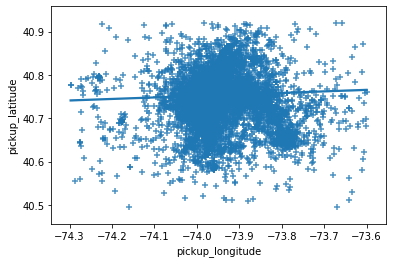

In [27]:
df2 = data[data['year']==2009]
df = df2[df2['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

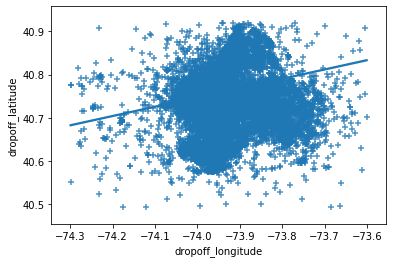

In [28]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

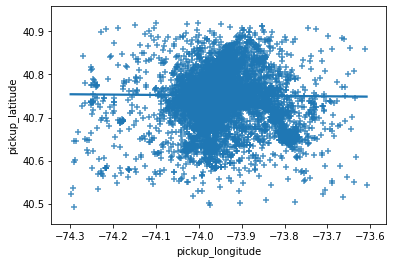

In [29]:
df2 = data[data['year']==2011]
df = df2[df2['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

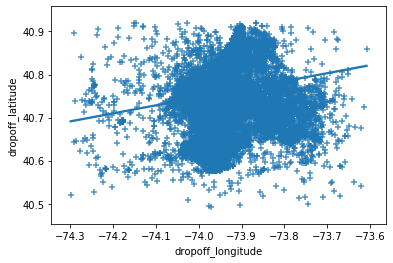

In [30]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")

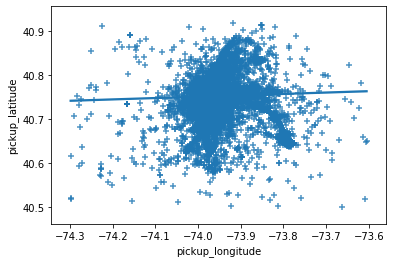

In [31]:
df2 = data[data['year']==2012]
df = df2[df2['hour']==19]
ax = sns.regplot(x=df['pickup_longitude'], y=df['pickup_latitude'], marker="+")

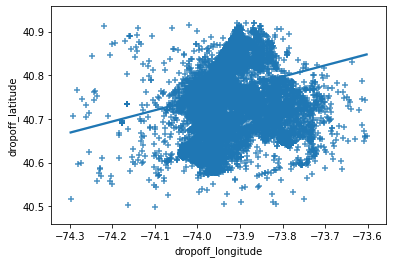

In [32]:
df = df[df['dropoff_latitude']>40.49]
df = df[df['dropoff_latitude']<40.92]
df = df[df['dropoff_longitude']>-74.3]
df = df[df['dropoff_longitude']<-73.6]
ax = sns.regplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], marker="+")